<a href="https://colab.research.google.com/github/JaiswalFelipe/Learning-Python/blob/main/NumpyPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy Part 2**
- Importing and Saving Data with NumPy
- Statistics with NumPy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Importing and Saving Data with NumPy**
- Note: Delimiters are Pre-defined symbols (e.g. "," and ";") which are used to define distinct fields in text files (e.g. cells in a row, rows in a table) 
  - Check delimeter manually by using notepad++
- It is crucial to make sure we import our data in the most appropriate type
- It's important to know how to use both approaches (.npy vs .csv/.txt)
  - .npy files are much more efficient

##### np.loadtxt() vs np.genfromtxt()
- np.array_equal() to check if files are identical

In [ ]:
# np.loadtxt() "load" implies the data is ready to be directly imported and used 
# FASTER but breaks when we feed it "incomplete or ill-formatted" datasets
lending_co_data_numeric_1 = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data.csv",
                                       delimiter = ",")
lending_co_data_numeric_1

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [ ]:
# np.genfromtxt() "generate" indicates that the function creates the dataset from the textfile (HAS MORE FLEXIBILITY)
# SLIGHTLY SLOWER but can handle "MISSING VALUES"
# PREFERRED when working with data not created by yourself
lending_co_data_numeric_2 = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data.csv",
                                       delimiter = ",")
lending_co_data_numeric_2

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [ 2000.,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [ ]:
# Check if they are Identical
np.array_equal(lending_co_data_numeric_1, lending_co_data_numeric_2)

True

##### Simple Cleaning when Importing
- delimiter
- skip_header
- skip_footer
- usecols
- unpack

In [ ]:
lending_co_data_numeric_NAN = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data-NAN.csv",
                                       delimiter = ";")
lending_co_data_numeric_NAN

array([[ 2000.,    40.,   365.,  3121.,  4241., 13621.],
       [ 2000.,    40.,   365.,  3061.,  4171., 15041.],
       [ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       ...,
       [   nan,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [ ]:
# skip_header: Convinient when text files include several lines of comments and notes from the authors
# skip_footer: Vice versa
lending_co_data_numeric_NAN = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data-NAN.csv",
                                       delimiter = ";",
                                       skip_header = 2) # Removes the first 2 lines of the dataset 
lending_co_data_numeric_NAN

array([[ 1000.,    40.,   365.,  2160.,  3280., 15340.],
       [ 2000.,    40.,   365.,  3041.,  4241., 15321.],
       [ 2000.,    50.,   365.,  3470.,  4820., 13720.],
       ...,
       [   nan,    40.,   365.,  4201.,  5001., 16600.],
       [ 1000.,    40.,   365.,  2080.,  3320., 15600.],
       [ 2000.,    40.,   365.,  4601.,  4601., 16600.]])

In [ ]:
# "usecols" == use columns
lending_co_data_numeric_NAN = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data-NAN.csv",
                                       delimiter = ";",
                                       usecols = (0,1,5)) # Tells python we're only interested in the first "0", second "1", and 6th "5" columns
                                                          # You can reorder the columns i.e. (5,0,1)
lending_co_data_numeric_NAN

array([[ 2000.,    40., 13621.],
       [ 2000.,    40., 15041.],
       [ 1000.,    40., 15340.],
       ...,
       [   nan,    40., 16600.],
       [ 1000.,    40., 15600.],
       [ 2000.,    40., 16600.]])

In [ ]:
# Assign each column to "separate" variables?
# unpack = True
lending_co_data_5, lending_co_data_0, lending_co_data_1 = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Numeric-Data-NAN.csv",
                                                                        delimiter = ";",
                                                                        usecols = (5,0,1),
                                                                        unpack = True)     # This splits the output: one for each variable

print(lending_co_data_5)
print(lending_co_data_0)
print(lending_co_data_1)

[13621. 15041. 15340. ... 16600. 15600. 16600.]
[2000. 2000. 1000. ...   nan 1000. 2000.]
[40. 40. 40. ... 40. 40. 40.]


##### String vs Object vs Numbers
- nan = not a number

In [ ]:
lending_co_lt = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/lending-co-LT.csv",
                                       delimiter = ",")
print(lending_co_lt) # To display neater/organized

[[      nan       nan       nan ...       nan       nan       nan]
 [1.000e+00       nan       nan ...       nan       nan 1.660e+04]
 [2.000e+00       nan       nan ...       nan       nan 1.660e+04]
 ...
 [1.041e+03       nan       nan ...       nan       nan 1.660e+04]
 [1.042e+03       nan       nan ...       nan       nan 1.560e+04]
 [1.043e+03       nan       nan ...       nan       nan 1.660e+04]]


In [ ]:
# Import as Int
lending_co_lt = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/lending-co-LT.csv",
                                       delimiter = ",",
                                       dtype = np.int32)  
print(lending_co_lt)

# Now, the output is not in scientific notation values
# While nans are now "-1"

[[   -1    -1    -1 ...    -1    -1    -1]
 [    1    -1    -1 ...    -1    -1 16600]
 [    2    -1    -1 ...    -1    -1 16600]
 ...
 [ 1041    -1    -1 ...    -1    -1 16600]
 [ 1042    -1    -1 ...    -1    -1 15600]
 [ 1043    -1    -1 ...    -1    -1 16600]]


In [ ]:
# Import as text
lending_co_lt = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/lending-co-LT.csv",
                                       delimiter = ",",
                                       dtype = np.str)  
print(lending_co_lt)

[['LoanID' 'StringID' 'Product' ... 'Location' 'Region' 'TotalPrice']
 ['1' 'id_1' 'Product B' ... 'Location 2' 'Region 2' '16600.0']
 ['2' 'id_2' 'Product B' ... 'Location 3' '' '16600.0']
 ...
 ['1041' 'id_1041' 'Product B' ... 'Location 23' 'Region 4' '16600.0']
 ['1042' 'id_1042' 'Product C' ... 'Location 52' 'Region 6' '15600.0']
 ['1043' 'id_1043' 'Product B' ... 'Location 142' 'Region 6' '16600.0']]


In [ ]:
# Import as objects
# WARNING: SERIES NO LONGER STORE STRINGS AS OBJECTS (NOT USEFUL NOW)
lending_co_lt = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/lending-co-LT.csv",
                                       delimiter = ",",
                                       dtype = np.object)  
print(lending_co_lt)

# "b" means that the data inside is not just plain text, so we can't freeøy manipulate the values

[[b'LoanID' b'StringID' b'Product' ... b'Location' b'Region'
  b'TotalPrice']
 [b'1' b'id_1' b'Product B' ... b'Location 2' b'Region 2' b'16600.0']
 [b'2' b'id_2' b'Product B' ... b'Location 3' b'' b'16600.0']
 ...
 [b'1041' b'id_1041' b'Product B' ... b'Location 23' b'Region 4'
  b'16600.0']
 [b'1042' b'id_1042' b'Product C' ... b'Location 52' b'Region 6'
  b'15600.0']
 [b'1043' b'id_1043' b'Product B' ... b'Location 142' b'Region 6'
  b'16600.0']]


##### np.save()
- Creates a "file-name.npy" file
- NPY is a special type of text file native to NumPy
- Faster than CSV
- takes up less memory space

**Note:**
  - Load a dataset != import a dataset
  - Importing does not keep track of the datatype of the original array 

In [ ]:
lending_co = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.csv",
                           delimiter = ",",
                           dtype = np.str)
print(lending_co)

[['LoanID' 'StringID' 'Product' ... 'Location' 'Region' 'TotalPrice']
 ['1' 'id_1' 'Product B' ... 'Location 2' 'Region 2' '16600.0']
 ['2' 'id_2' 'Product B' ... 'Location 3' '' '16600.0']
 ...
 ['1041' 'id_1041' 'Product B' ... 'Location 23' 'Region 4' '16600.0']
 ['1042' 'id_1042' 'Product C' ... 'Location 52' 'Region 6' '15600.0']
 ['1043' 'id_1043' 'Product B' ... 'Location 142' 'Region 6' '16600.0']]


In [ ]:
# This generates NPY file
#np.save("Lending-Company-Saving", lending_co)

##### np.savez()

In [ ]:
lending_co = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.csv",
                           delimiter = ",",
                           dtype = np.str)

lending_data_save = np.load("Lending-Company-Saving,npy")

In [ ]:
# Creates .npz file
# NPZ is like an archive of NPYs that can store "MULTIPLE ARRAYS"
# Instead of storing different datasets in separate NPY files, we can store all of them in a single NPZ
# Useful when working with large amts of data
np.savez("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving",
         lending_co,
         lending_data_save) # As input of npz

In [ ]:
# Loading the file
lending_data_savez = np.load("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.npz")

# The NPZ contains a collection of arrays
# So we must specify the array we want to open like so:
# For the very first 1:

print(lending_data_savez["arr_0"])

In [ ]:
# To avoid using ["arr_0"]

np.savez("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving",
         company = lending_co,
         data_save = lending_data_save)

In [ ]:
# Now load
lending_data_savez = np.load("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.npz")

In [ ]:
# Check files
lending_data_savez.files

In [ ]:
# Now instead of using ["arr_0"]
print(lending_data_savez["company"])

##### np.savetxt()
- Not limited to numpy vs savez, and save

In [ ]:
lending_co = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.csv",
                           delimiter = ",",
                           dtype = np.str)

In [ ]:
# Specify .txt
np.savetxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.txt",
           lending_co,
           fmt = '%s', # Format specifier for string values
           delimiter = ',') 

In [ ]:
# np.savetxt() requires importing the file
lending_data_savetxt = np.genfromtxt("/content/drive/MyDrive/Colab Notebooks/365 Data Science/Programming/Numpy/Files for NumpyPart2/Importing and Saving Data with Numpy/Lending-Company-Saving.txt",
                                     delimiter = ',',
                                     dtype = np.str)
print(lending_data_savetxt)

[['LoanID' 'StringID' 'Product' ... 'Location' 'Region' 'TotalPrice']
 ['1' 'id_1' 'Product B' ... 'Location 2' 'Region 2' '16600.0']
 ['2' 'id_2' 'Product B' ... 'Location 3' '' '16600.0']
 ...
 ['1041' 'id_1041' 'Product B' ... 'Location 23' 'Region 4' '16600.0']
 ['1042' 'id_1042' 'Product C' ... 'Location 52' 'Region 6' '15600.0']
 ['1043' 'id_1043' 'Product B' ... 'Location 142' 'Region 6' '16600.0']]


### **Statistics with NumPy**

##### np.mean()

In [ ]:
matrix_A = np.array([[1,2,3,4,5],[0,5,3,1,2],[9,5,7,8,8]])
matrix_A

array([[1, 2, 3, 4, 5],
       [0, 5, 3, 1, 2],
       [9, 5, 7, 8, 8]])

In [ ]:
# Whole matrix
print(np.mean(matrix_A))
print("")

# First array
print(np.mean(matrix_A[0]))
print("")

# First column
print(np.mean(matrix_A[:,0]))
print("")

# Using axis: to calculate every columns (useful with big datasets)
print(np.mean(matrix_A, axis = 0))
print("")

# For every row:
# In addition, you can also control the datatype of the outputs
print(np.mean(matrix_A, axis = 1, dtype = np.int64))
print("")

# Squareroot of every element within the array
print(np.sqrt(matrix_A))

4.2

3.0

3.3333333333333335

[3.33333333 4.         4.33333333 4.33333333 5.        ]

[3 2 7]

[[1.         1.41421356 1.73205081 2.         2.23606798]
 [0.         2.23606798 1.73205081 1.         1.41421356]
 [3.         2.23606798 2.64575131 2.82842712 2.82842712]]


##### Minimal and Maximal Values in NumPy

In [ ]:
print(np.min(matrix_A)) # Is the same as np.amin()
print("")

# np.minimum() compares the values at the same position in each of the arrays before taking the lowest one
# Hence requires "ATLEAST" 2 input arrays
print(np.minimum(matrix_A[1], matrix_A[2]))


0

[0 5 3 1 2]


##### Statistical Order Functions in NumPy
- np.ptp()
- np.percentile()
- np.quantile()
- np.median()

In [ ]:
# np.ptp() peak to peak: Returns the difference between the highest and lowest values within an array
np.ptp(matrix_A)  # Highest 9 - Lowest 0 = 9

9

In [ ]:
# np.percentile() returns a specific percentile of a given set
# Requires a second input: the percentile
# A percentile is a value that is greater than the corresponding % of the dataset
# I.E. The 70th percentile is greater than 70% of the data
# Another way to look at this: We're 70% through a sorted version of the array (in increasing order)
print(np.percentile(matrix_A, 70))
print("")
# In addition, interpolation can be set
#print(np.percentile(matrix_A, 70, interpolation = "nearest"))   # lower, higher, midpoint, nearest(round: recommended)

# Median: middle value of a sorted dataset
print(np.percentile(matrix_A, 50))
print("")

#Or the right way for Median:
print(np.median(matrix_A))

5.0

4.0

4.0


In [ ]:
# np.quantile() A value that is greater than the corresponding part of the dataset
# 70th percentile == 0.7 quantile
print(np.quantile(matrix_A, 0.70))

5.0


##### Variance, STD, and Mean !=totally Average

In [ ]:
# np.average() can compute the weighted avg of a dataset unlike np.mean()

In [ ]:
# Variance
np.var(matrix_A)

7.493333333333334

In [ ]:
# STD
np.std(matrix_A)

2.737395355686375

##### Covariance and Correlation in NumPy

In [ ]:
print(matrix_A)
print("")

# Covariance
print(np.cov(matrix_A))

[[1 2 3 4 5]
 [0 5 3 1 2]
 [9 5 7 8 8]]

[[ 2.5   0.    0.25]
 [ 0.    3.7  -2.85]
 [ 0.25 -2.85  2.3 ]]


In [ ]:
# Correlation
np.corrcoef(matrix_A)

array([[ 1.        ,  0.        ,  0.10425721],
       [ 0.        ,  1.        , -0.97696742],
       [ 0.10425721, -0.97696742,  1.        ]])

##### Histograms
- A way to examine a dataset by dissecting its density: 
  - How many values from a daset fall within some predetermined range

In [ ]:
#import matplotlib.pyplot as plt

np.sort(matrix_A, axis = None)

array([0, 1, 1, 2, 2, 3, 3, 4, 5, 5, 5, 7, 8, 8, 9])

In [ ]:
print(np.histogram(matrix_A))
print("")
# The first array represents how many times a values falls within each bin
# The second array depicts the edge of each bins: end point of the first bin, and starting point of the next
# Hence, 1st array is always "1" greater than the 2nd

# You can select which array you are interested specifically:
print(np.histogram(matrix_A)[0])

(array([1, 2, 2, 2, 1, 3, 0, 1, 2, 1]), array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

[1 2 2 2 1 3 0 1 2 1]


In [ ]:
# The default bin is not always optimal for every dataset, therefore you can set it:
np.histogram(matrix_A, bins = 4)

(array([5, 3, 3, 4]), array([0.  , 2.25, 4.5 , 6.75, 9.  ]))

In [ ]:
# You can also set the "range"(fixed interval): Very easy way to ignore outliers
np.histogram(matrix_A, bins = 4, range = (1,7))   # Excluded 0, 8, and 9

(array([4, 2, 4, 1]), array([1. , 2.5, 4. , 5.5, 7. ]))

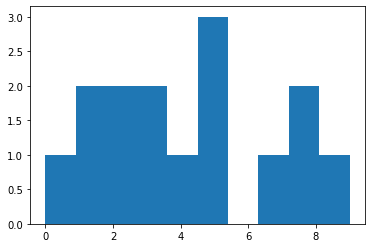

In [ ]:
# Visualize
plt.hist(matrix_A.flat, bins = np.histogram(matrix_A)[1])
plt.show()

##### Multidimensional Histograms
- Histogram ontop of a scatterplot

In [ ]:
matrix_A

array([[1, 2, 3, 4, 5],
       [0, 5, 3, 1, 2],
       [9, 5, 7, 8, 8]])

In [ ]:
np.histogram2d(matrix_A[0], matrix_A[1], bins = 4)
# The 2D array is the density array
# The other 2 are bin edges for each plane 

(array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 1., 0., 0.]]),
 array([1., 2., 3., 4., 5.]),
 array([0.  , 1.25, 2.5 , 3.75, 5.  ]))

##### NAN Equivalent Functions in NumPy
- The np.mean() does not provide any numeric value when facing INCOMPLETE DATA
- SO np.nanmean()
- They run while ignoring all NAN values in the data

In [ ]:
# Matrix that has nan 
matrix_B = np.array([[1,2,3,4,5],[2,5,np.nan,4,7],[7,4,9,7,5]])
matrix_B

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 2.,  5., nan,  4.,  7.],
       [ 7.,  4.,  9.,  7.,  5.]])

In [ ]:
np.nanmean(matrix_B)

4.642857142857143

In [ ]:
# Can also use to other functions, I.E.
print(np.nanquantile(matrix_B, 0.7))
print("")

print(np.nanvar(matrix_B))

5.199999999999999

4.801020408163266
